In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
df = pd.read_csv("Churn.csv", sep = ";")

In [3]:
#Visualizar dados
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#Dimensões do df
df.shape

(999, 12)

In [5]:
#Agora vamos dar os nomes corretos às colunas
df.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCrédito", "Ativo", "Salario", "Saiu"]

In [6]:
#Agora vamos ver como ficaram os nomes das colunas
df.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
 #Explorar dados categóricos com o método groupby() do df (utilizar o método .size())
agrupado = df.groupby(["Estado"]).size()

In [8]:
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

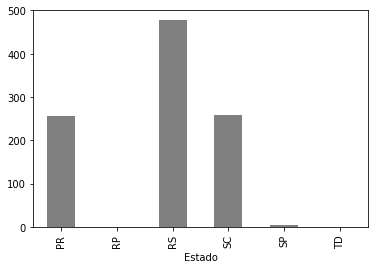

In [9]:
#Forma utilizando gráficos para visualizar dados categóricos
agrupado.plot.bar(color = "grey")

In [10]:
#Agrupando gênero (outro dado categórico/qualitativo)
agrupadoGen = df.groupby(["Genero"]).size()

In [11]:
agrupadoGen

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

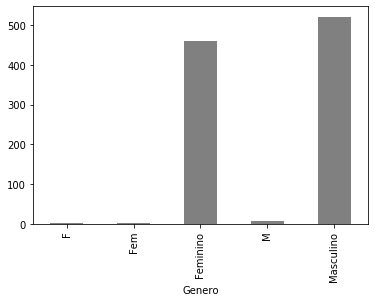

In [12]:
#Exibindo um gráfico representando a distribuição bruta de gêneros:
agrupadoGen.plot.bar(color = "grey")

In [13]:
#Explorando dados numéricos/quantitativos (score)
df["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

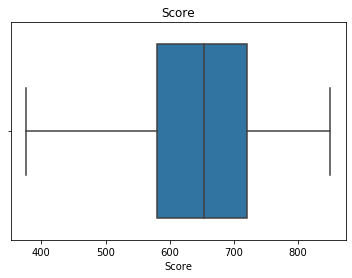

In [14]:
# Gerando um gráfico de boxplot do Score (uso da biblioteca seaborn):
srn.boxplot(df["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

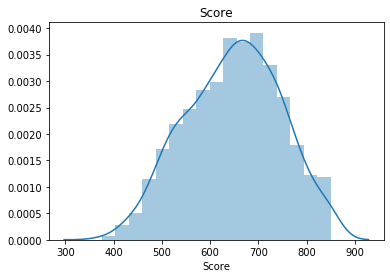

In [15]:
# Gerando um gráfico de histograma da variável Score (também usando a biblioteca seaborn):
srn.distplot(df["Score"]).set_title("Score")

In [16]:
# Explorando outra variável quantitativa/escalar (idade):
df["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

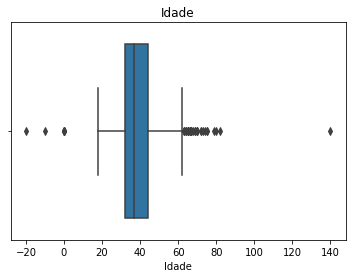

In [17]:
# Gerando o gráfico boxplot e histograma da variável idade:
srn.boxplot(df["Idade"]).set_title("Idade")

Text(0.5, 1.0, 'Idade')

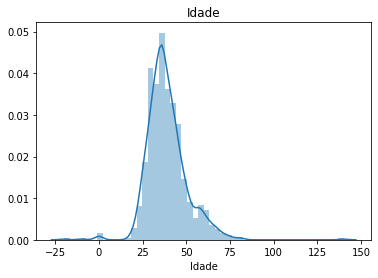

In [18]:
srn.distplot(df["Idade"]).set_title("Idade")

In [19]:
# Analisando outra variável quantitativa (saldo):
df["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

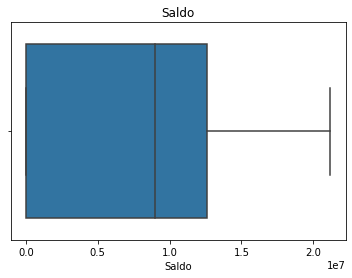

In [20]:
srn.boxplot(df["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

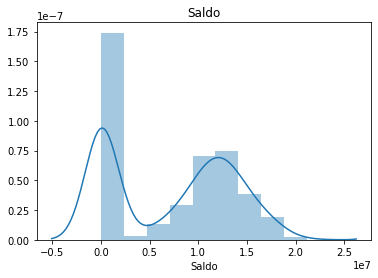

In [21]:
srn.distplot(df["Saldo"]).set_title("Saldo")

In [22]:
# Analisando mais uma variável quantitativa (Salário)
df["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

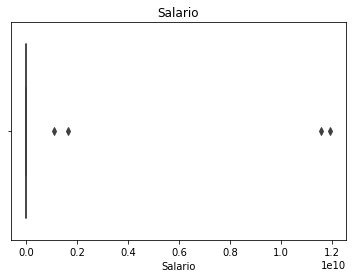

In [23]:
# Analisando os gráficos de boxplot e histograma da variável salário:
srn.boxplot(df["Salario"]).set_title("Salario")

Text(0.5, 1.0, 'Salario')

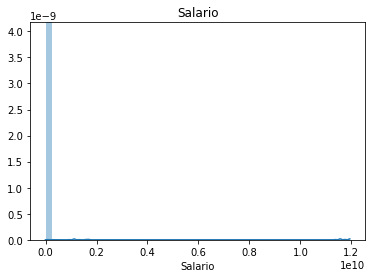

In [24]:
srn.distplot(df["Salario"]).set_title("Salario")

In [69]:
#Contando os valores do tipo NAN (Missing Value)
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [72]:
moda = sts.mode(df["Genero"])

In [73]:
# Substituindo os valores do tipo NAN para valores da mediana (lembrando que isso é para dados quantitativos)
df["Genero"].fillna(moda, inplace = True)

In [28]:
mediana = sts.median(df["Salario"])

In [29]:
df["Salario"].fillna(mediana, inplace = True)

In [30]:
#Verificando se ainda existem valores NAN:
df.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCrédito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [68]:
df.groupby(["Genero"]).size()

Genero
70518.0        8
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [89]:
# Padronizando os registros de dados qualitativos (gênero)
df.loc[df["Genero"] == "M", "Genero"] = "Masculino"
# Aproveitando para corrigir um erro que fiz (tinha acrescentado a mediana de Salário aos NaN de gênero)
df.loc[df["Genero"] == 70518.0, "Genero"] = "Masculino"

In [90]:
# Utilizamos a mesma lógica para o sexo feminino. Entretanto, há 3 registros diferentes que queremos padronizar, então usamos o método .isin()
df.loc[df["Genero"].isin(["Feminino", "F", "Fem"]), "Genero"] = "Feminino"

In [92]:
# Agora vamos verificar a padronização de gênero:
df.groupby(["Genero"]).size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [108]:
# Agora vamos padronizar as idades (que possuem números negativos e o outlier 140):
df.groupby(["Idade"]).size()

Idade
18.0     1
19.0     2
20.0     1
21.0     6
22.0     7
23.0     4
24.0    15
25.0    22
26.0    22
27.0    16
28.0    24
29.0    33
30.0    32
31.0    43
32.0    37
33.0    36
34.0    47
35.0    56
36.0    59
37.0    52
38.0    44
39.0    40
40.0    32
41.0    36
42.0    39
43.0    30
44.0    26
45.0    26
46.0    25
47.0    12
48.0    21
49.0    16
50.0    10
51.0    14
52.0     7
53.0     8
54.0     6
55.0     4
56.0     7
57.0    13
58.0    11
59.0     3
60.0     6
61.0     8
62.0     6
63.0     3
64.0     3
65.0     4
66.0     4
67.0     5
68.0     1
69.0     2
70.0     3
72.0     2
73.0     1
74.0     1
75.0     2
79.0     1
80.0     1
82.0     1
dtype: int64

In [111]:
# Por serem dados escalares, substituímos os outliers por valores da mediana (para isso utilizamos o loc, com uma associação de condições unidas pelo operador or):
df.loc[(df["Idade"] <= 0 ) | (df["Idade"] > 120), "Idade"] = df["Idade"].median()

In [112]:
# Vamos verificar se ainda existem outliers da variável Idade
df.loc[(df["Idade"] <= 0) | (df["Idade"] > 120), "Idade"]

Series([], Name: Idade, dtype: float64)

In [119]:
# Agora vamos verificar dados duplicados. Pegamos a variável Id para averiguar duplicatas:
df[df["Id"].duplicated()]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salario,Saiu
81,81,665,RS,Feminino,34.0,1,9664554,2,0,0,17141366.0,0


In [123]:
# Utilizamos o método drop_duplicated para deletar uma duplicata (se quiser fazer a alteração no dataset, utilizar o argumento opcional inplace = True)
df.drop_duplicates(subset = "Id", keep = "first", inplace = True)

In [126]:
# Verificando se ainda existem dados duplicados:
df[df.duplicated()] == True

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCrédito,Ativo,Salario,Saiu


In [145]:
# Agora vamos corrigir os dados nominais Estado
df.groupby(["Estado"]).size()

Estado
PR    257
RS    477
SC    258
dtype: int64

In [143]:
df.loc[df["Estado"].isin(["RP", "TD", "SP"]), "Estado"] = sts.mode(df["Estado"])

In [144]:
df.groupby(["Estado"]).size()

Estado
PR    257
RS    477
SC    258
dtype: int64

In [148]:
# Agora vamos analisar a variável "Salários". Utilizamos o desvio padrão como critério para avaliar outliers (acima de 2 desvios padrão). Primeiro passo é checar se algum atende o critério:
df.loc[(df["Salario"] > df["Salario"].mean() + 2 * df["Salario"].std()) | (df["Salario"] < df["Salario"].mean() - 2 * df["Salario"].std()), "Salario"].value_counts()

1.119812e+09    1
1.640179e+09    1
1.193469e+10    1
1.156383e+10    1
Name: Salario, dtype: int64

In [149]:
# Visto que existem 4 outliers para Salário, vamos substituí-los por valores da mediana:
df.loc[df["Salario"] >= df["Salario"].mean() + 2 * df["Salario"].std(), "Salario"] = df["Salario"].median()

In [150]:
# Aplicamos novamente o comando de acesso a outliers da variável Salario (utilizado na penúltima execução)
df.loc[(df["Salario"] > df["Salario"].mean() + 2 * df["Salario"].std()) | (df["Salario"] < df["Salario"].mean() - 2 * df["Salario"].std()), "Salario"].value_counts()

Series([], Name: Salario, dtype: int64)

In [153]:
df.head()

(998, 12)

In [152]:
df.shape

(998, 12)